# Visualize PyEMMA `MDFeaturizer`-objects
<pre> 
Guillermo Perez-Hernandez  guille.perez@fu-berlin.de 
</pre>
   
In this notebook we will be using the 1 millisecond trajectory of Bovine Pancreatic Trypsin Inhibitor (BPTI) generated by DE Shaw Research on the Anton Supercomputer and kindly made available by their lab. The original work is 
 
 * Shaw DE, Maragakis P, Lindorff-Larsen K, Piana S, Dror RO, Eastwood MP, Bank JA, Jumper JM, Salmon JK, Shan Y, Wriggers W: Atomic-level characterization of the structural dynamics of proteins. Science 330:341-346 (2010).  doi: 10.1126/science.1187409.
 
The trajectory has been duplicated and shortened to provide a mock-trajectory set and be able to deal with lists of trajectories of different lenghts:

 * `c-alpha_centered.stride.100.xtc`
 * `c-alpha_centered.stride.100.reversed.xtc`
 * `c-alpha_centered.stride.100.halved.xtc`

In [1]:
top = 'notebooks/data/bpti-c-alpha_centered.pdb'
MD_trajfiles = ['notebooks/data/c-alpha_centered.stride.1000.xtc',
               'notebooks/data/c-alpha_centered.stride.1000.reversed.xtc',
                'notebooks/data/c-alpha_centered.stride.1000.halved.xtc'
               ]

dt = 244 #saving interval in the .xtc files, in ns

import molpx
from matplotlib import pylab as plt
%matplotlib notebook
import pyemma
import numpy as np

# This way the user does not have to care where the data are:
top = molpx._molpxdir(top)
MD_trajfiles = [molpx._molpxdir(ff) for ff in MD_trajfiles]

In [2]:
# Create a memory representation of the trajectories
MD_list = [molpx.generate._md.load(itraj, top=top) for itraj in MD_trajfiles]

In [3]:
feat = pyemma.coordinates.featurizer(top)
pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
feat.add_distances(pairs)
src  = pyemma.coordinates.source(MD_trajfiles, features=feat)
Y = src.get_output()        
feat.describe()[108], feat.describe()[112], feat

('DIST: PRO 9 CA 8 - LYS 15 CA 14',
 'DIST: PRO 9 CA 8 - TYR 23 CA 22',
 <pyemma.coordinates.data.featurization.featurizer.MDFeaturizer at 0x7f4355daff98>)

## Visualize a FES and the Features

<IPython.core.display.Javascript object>


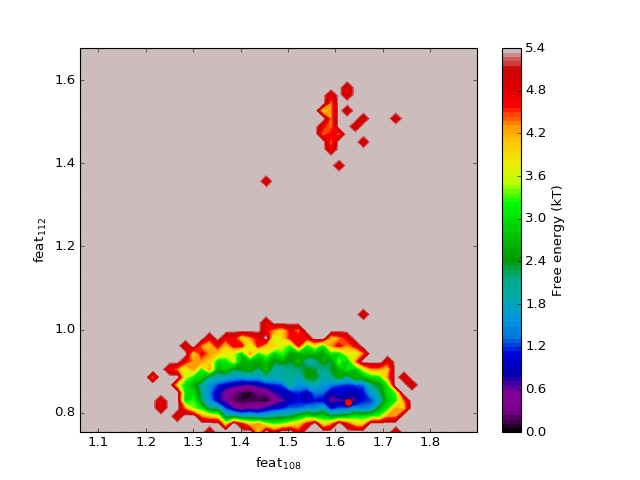

In [4]:
proj_idxs = [108,112]
ax, fig, iwd, data_sample, geom = molpx.visualize.FES(MD_list,                                                       
                                                      top,                                                       
                                                      Y, 
                                                      nbins=50, 
                                                      proj_idxs=proj_idxs,
                                                      #proj_labels=feat,
                                                      proj_labels='feat',
                                                      #n_overlays=5,
                                                      #sticky=True,
                                          )
#molpx.visualize.feature(feat.active_features[0], iwd, idxs=proj_idxs, radius=.5, 
#                        color_list=['red','green'])
iwd
#iwd.display(gui=True)

## Visualize trajectories and the features


<IPython.core.display.Javascript object>


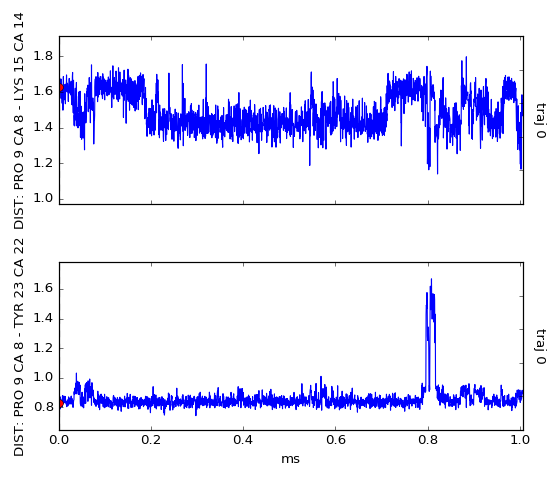

In [5]:
__, myfig, iwd, __ = molpx.visualize.traj(MD_trajfiles,     
                                          top,                                                                                                                              
                                          Y,                                        
                                          dt = dt*1e-6, tunits='ms',    
                                          active_traj=0,
                                          traj_selection = 0,
                                          #sharey_traj=False,
                                          #max_frames=100,
                                          proj_idxs=proj_idxs,
                                          panel_height=1,    
                                          #proj_labels=feat,
                                          proj_labels='feat',
                          )
myfig.tight_layout()
iwd
molpx.visualize.feature(feat.active_features[0], iwd, idxs=proj_idxs)

# Cartesian Features

In [6]:
feat = pyemma.coordinates.featurizer(top)
feat.add_all()
Y = [feat.transform(igeom.superpose(MD_list[0])) for igeom in MD_list]
feat.describe()[24], feat.describe()[42]

('ATOM:PRO 9 CA 8 x', 'ATOM:LYS 15 CA 14 x')

<IPython.core.display.Javascript object>


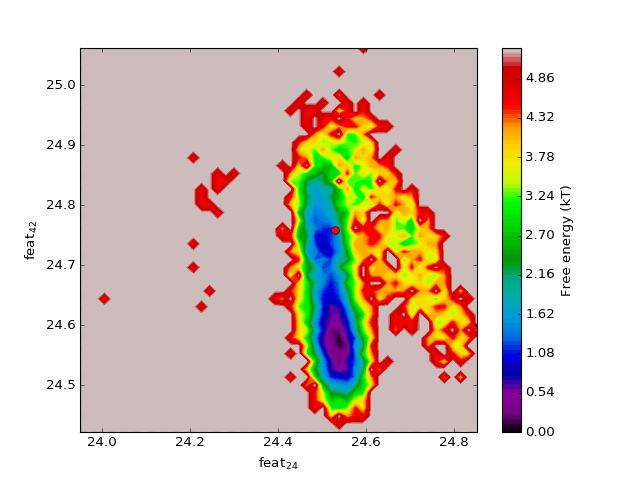

In [7]:
proj_idxs = [24,42]
ax, fig, iwd, data_sample, geom = molpx.visualize.FES(MD_list,                                                       
                                                      top,                                                       
                                                      Y, 
                                                      nbins=50, 
                                                      proj_idxs=proj_idxs,
                                                      proj_labels='feat',
                                                      #n_overlays=5,
                                          )
molpx.visualize.feature(feat.active_features[0], iwd, idxs=proj_idxs, color_list=['red','green'])
iwd

## Angular Features (Di-Ala)

In [8]:
from os.path import exists
top = molpx._molpxdir(join='notebooks/data/ala2.pdb')
# What data do we  have?
if exists('/group/ag_cmb/scratch/gph82/Di-Ala-nbdata/ala2.dcd'):
    MD_trajfiles = ['/group/ag_cmb/scratch/gph82/Di-Ala-nbdata/ala2.dcd'] #long trajectory
elif exists('/home/guille/ala2a.dcd'):
    MD_trajfiles = ['/home/guille/ala2.dcd'] # extra for Stralsund
else:
    MD_trajfiles = [molpx._molpxdir(join='notebooks/data/ala2.mini.xtc')] #short trajectory
    
feat = pyemma.coordinates.featurizer(top)
feat.add_backbone_torsions(
#    cossin=True
)
src  = pyemma.coordinates.source(MD_trajfiles, features=feat)
Y = src.get_output()

<IPython.core.display.Javascript object>


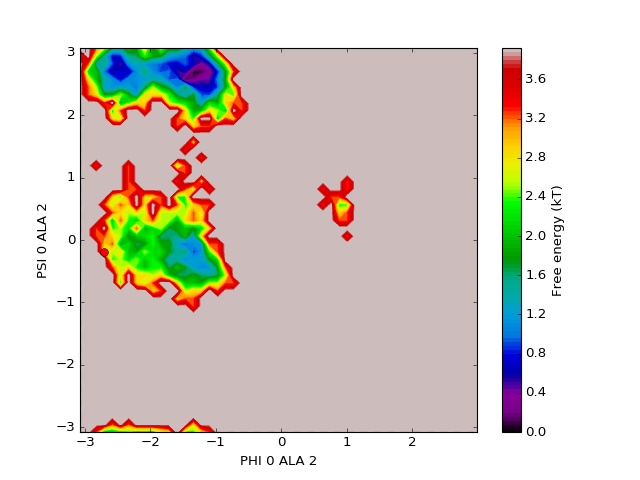

In [9]:
proj_idxs = [0,1]
ax, fig, iwd, data_sample, geom = molpx.visualize.FES(MD_trajfiles,
                                                      top,                                                       
                                                      Y, 
                                                      nbins=50, 
                                                      proj_idxs=proj_idxs,
                                                      proj_labels=feat,                                                      
                                                     )
molpx.visualize.feature(feat.active_features[0], iwd, idxs=[0], radius=.5)
iwd